Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
# import necessary modules 
import pandas as pd
import numpy as np

In [75]:
# read the city bikes and fsq files
fsq_data = pd.read_csv('fsq_data_cleaned.csv', index_col=0) # index_col to set index when reading csv
city_bikes_data = pd.read_csv('city_bikes_cleaned.csv', index_col=0)

In [76]:
# view the data
fsq_data.head()

,fsq_id,distance,bike_station_index,restaurants,parks
0,4aa7455df964a5208e4c20e3,308,0,1,0
1,4cd8423915d8b60c611f650e,354,0,1,0
2,5851f5b5297c16529dd5cf93,299,0,1,0
3,4aa75933f964a520bf4c20e3,400,0,1,0
4,4abfcaf5f964a5203c9220e3,385,0,1,0


In [77]:
# view the city bikes data
city_bikes_data.head()

,Station Name,Latitude,Longitude,Available Bikes
0,Chilco & Barclay,49.291909,-123.140713,12
1,St George & Broadway,49.262321,-123.093060,2
2,Britannia Parking Lot,49.275882,-123.071865,2
3,Morton & Denman,49.288030,-123.142135,9
4,Thornton & National,49.273777,-123.092723,2


In [78]:
# join the city bikes and fsq data 
df_merged = pd.merge(fsq_data,city_bikes_data,left_on='bike_station_index',right_on=city_bikes_data.index)
df_merged

,fsq_id,distance,bike_station_index,restaurants,parks,Station Name,Latitude,Longitude,Available Bikes
0,4aa7455df964a5208e4c20e3,308,0,1,0,Chilco & Barclay,49.291909,-123.140713,12
1,4cd8423915d8b60c611f650e,354,0,1,0,Chilco & Barclay,49.291909,-123.140713,12
2,5851f5b5297c16529dd5cf93,299,0,1,0,Chilco & Barclay,49.291909,-123.140713,12
3,4aa75933f964a520bf4c20e3,400,0,1,0,Chilco & Barclay,49.291909,-123.140713,12
4,4abfcaf5f964a5203c9220e3,385,0,1,0,Chilco & Barclay,49.291909,-123.140713,12
...,...,...,...,...,...,...,...,...,...
10447,5f2d918d3731e5073cb1d691,425,257,1,0,8th & Prince Edward,49.263518,-123.095680,0
10448,4c14598fa5eb76b03cb5c1b7,428,257,1,0,8th & Prince Edward,49.263518,-123.095680,0
10449,5c6fc0c3446ea60037c21fd9,429,257,1,0,8th & Prince Edward,49.263518,-123.095680,0
10450,4ace7f72f964a520e6d020e3,440,257,1,0,8th & Prince Edward,49.263518,-123.095680,0


In [79]:
# define the agg function for groupby
agg_dict = {'distance': 'mean',
           'Available Bikes': 'mean',
           'Latitude': 'mean',
           'Longitude': 'mean',
           'restaurants': 'sum',
           'parks': 'sum'}

In [84]:
# group by station
df_joined = df_merged.groupby('bike_station_index').agg(agg_dict)

In [152]:
# save joined data to csv
df_joined.to_csv('city_bikes.csv')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import plotly.graph_objs as go
sns.set_theme()
%matplotlib inline     
sns.set(color_codes=True)

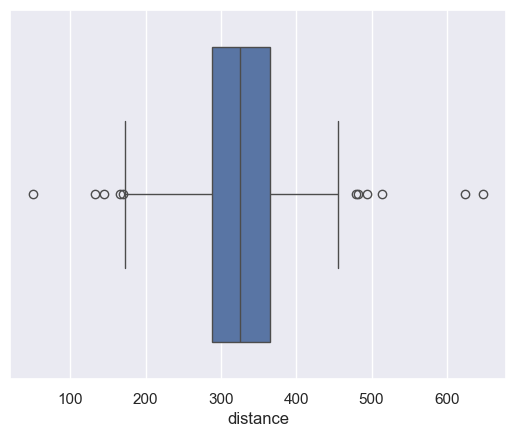

In [86]:
# Detecting Outliers
sns.boxplot(x=df_joined['distance'])
plt.show()

There are outliers to the left and to the right of the box. We will use the data as is as we have few data points.

In [ ]:
# check the descriptive statistics
df_joined.describe()

,distance,Available Bikes,Latitude,Longitude,restaurants,parks
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,325.051453,7.395349,49.271570,-123.123023,38.480620,2.031008
std,70.106044,5.529431,0.011640,0.039317,14.515576,1.602226
min,50.000000,0.000000,49.238105,-123.254307,0.000000,0.000000
25%,288.067973,3.000000,49.263115,-123.139179,29.250000,1.000000
50%,325.750000,6.000000,49.270830,-123.118546,47.000000,2.000000
75%,364.601061,10.000000,49.280403,-123.100094,49.000000,3.000000
max,648.620000,28.000000,49.302577,-123.056909,50.000000,7.000000


The results shows that we can ignore the outliers and use as is

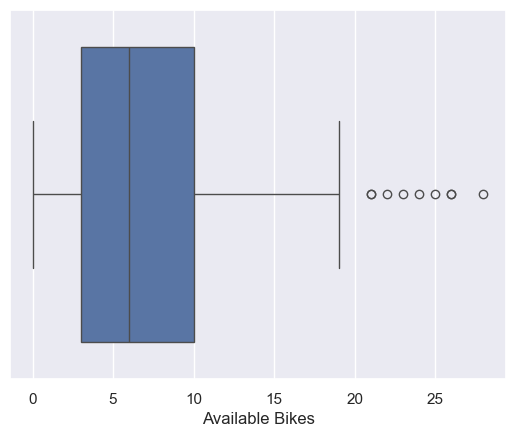

In [91]:
sns.boxplot(x=df_joined['Available Bikes'])
plt.show()

This also have ouliers, again we will leave as is.

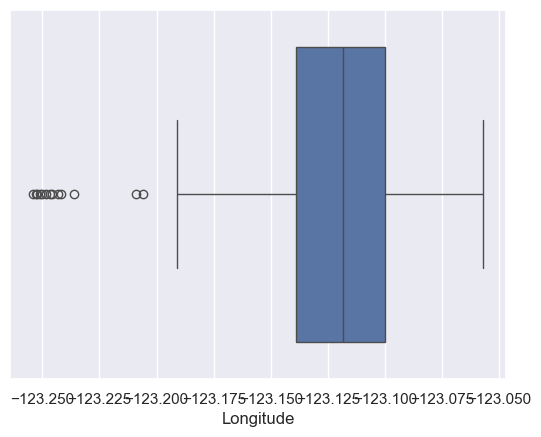

In [92]:
sns.boxplot(x=df_joined['Longitude'])
plt.show()

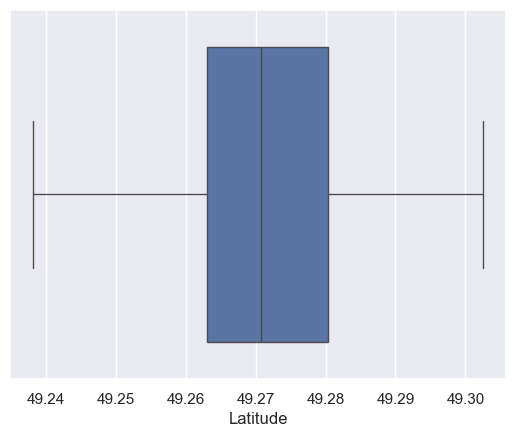

In [93]:
sns.boxplot(x=df_joined['Latitude'])
plt.show()

## Scatter Diagram, Heat Maps and Histogram

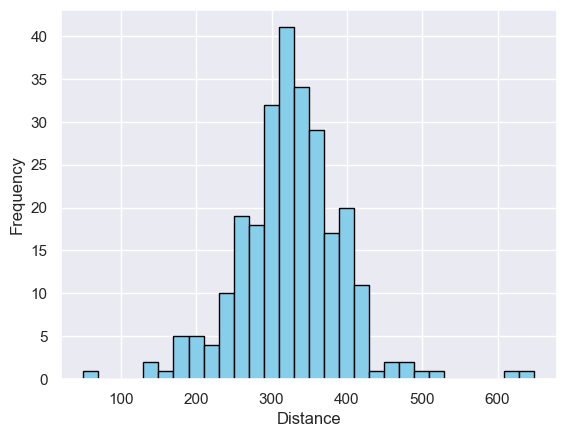

In [94]:
# Plot different features against one another (scatter), against frequency (histogram)
# Histogram

# Plotting a basic histogram
plt.hist(df_joined['distance'], bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Distance')
plt.ylabel('Frequency')
 
# Display the plot
plt.show()

This is normally distributed.

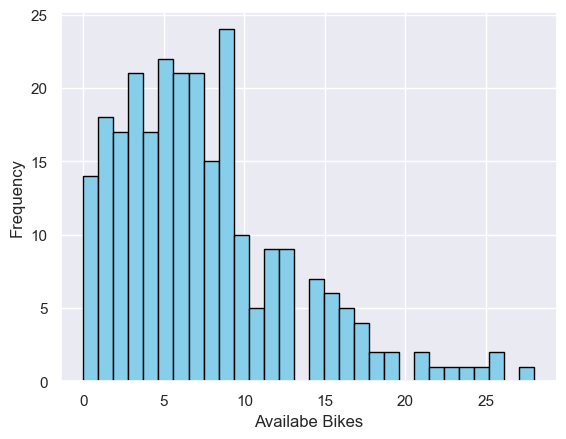

In [99]:
# Plot different features against one another (scatter), against frequency (histogram)
# Histogram

# Plotting a basic histogram
plt.hist(df_joined['Available Bikes'], bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Availabe Bikes')
plt.ylabel('Frequency')
 
# Display the plot
plt.show()

this is also skewed and we can detect an outlier

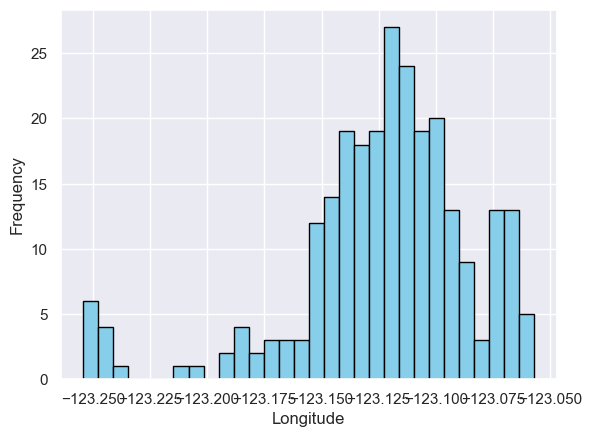

In [100]:
# Plot different features against one another (scatter), against frequency (histogram)
# Histogram

# Plotting a basic histogram
plt.hist(df_joined['Longitude'], bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Frequency')
 
# Display the plot
plt.show()

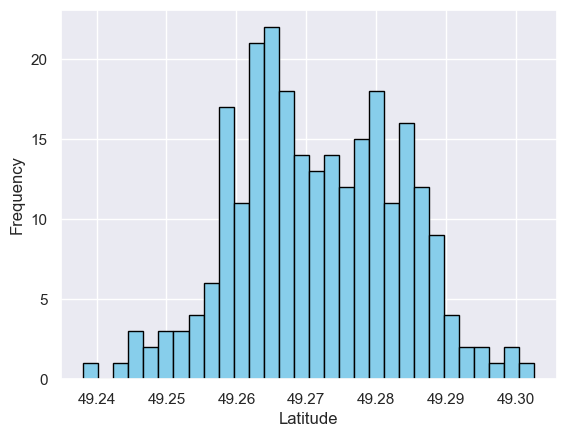

In [101]:
# Plot different features against one another (scatter), against frequency (histogram)
# Histogram

# Plotting a basic histogram
plt.hist(df_joined['Latitude'], bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Latitude')
plt.ylabel('Frequency')
 
# Display the plot
plt.show()

This shows normal distribution

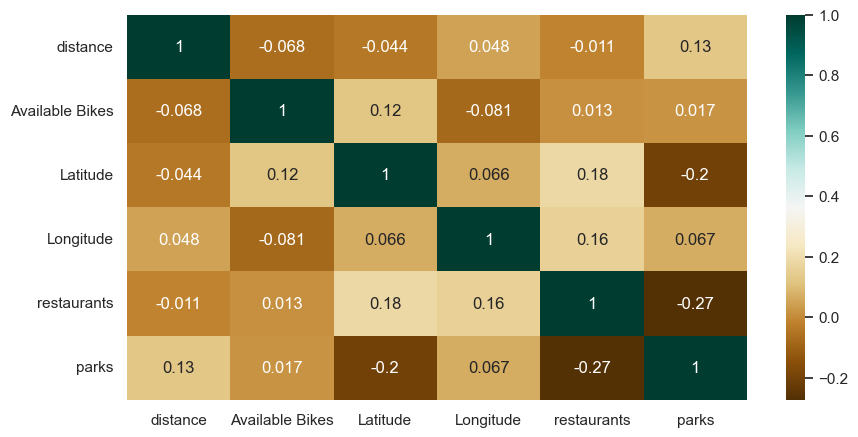

In [102]:
# Heat Maps
plt.figure(figsize=(10,5))
c= df_joined.corr(numeric_only=True)
sns.heatmap(c,cmap="BrBG",annot=True)
c
plt.show()

The heat maps above shows low correlation between the target variable and independent variables (features)

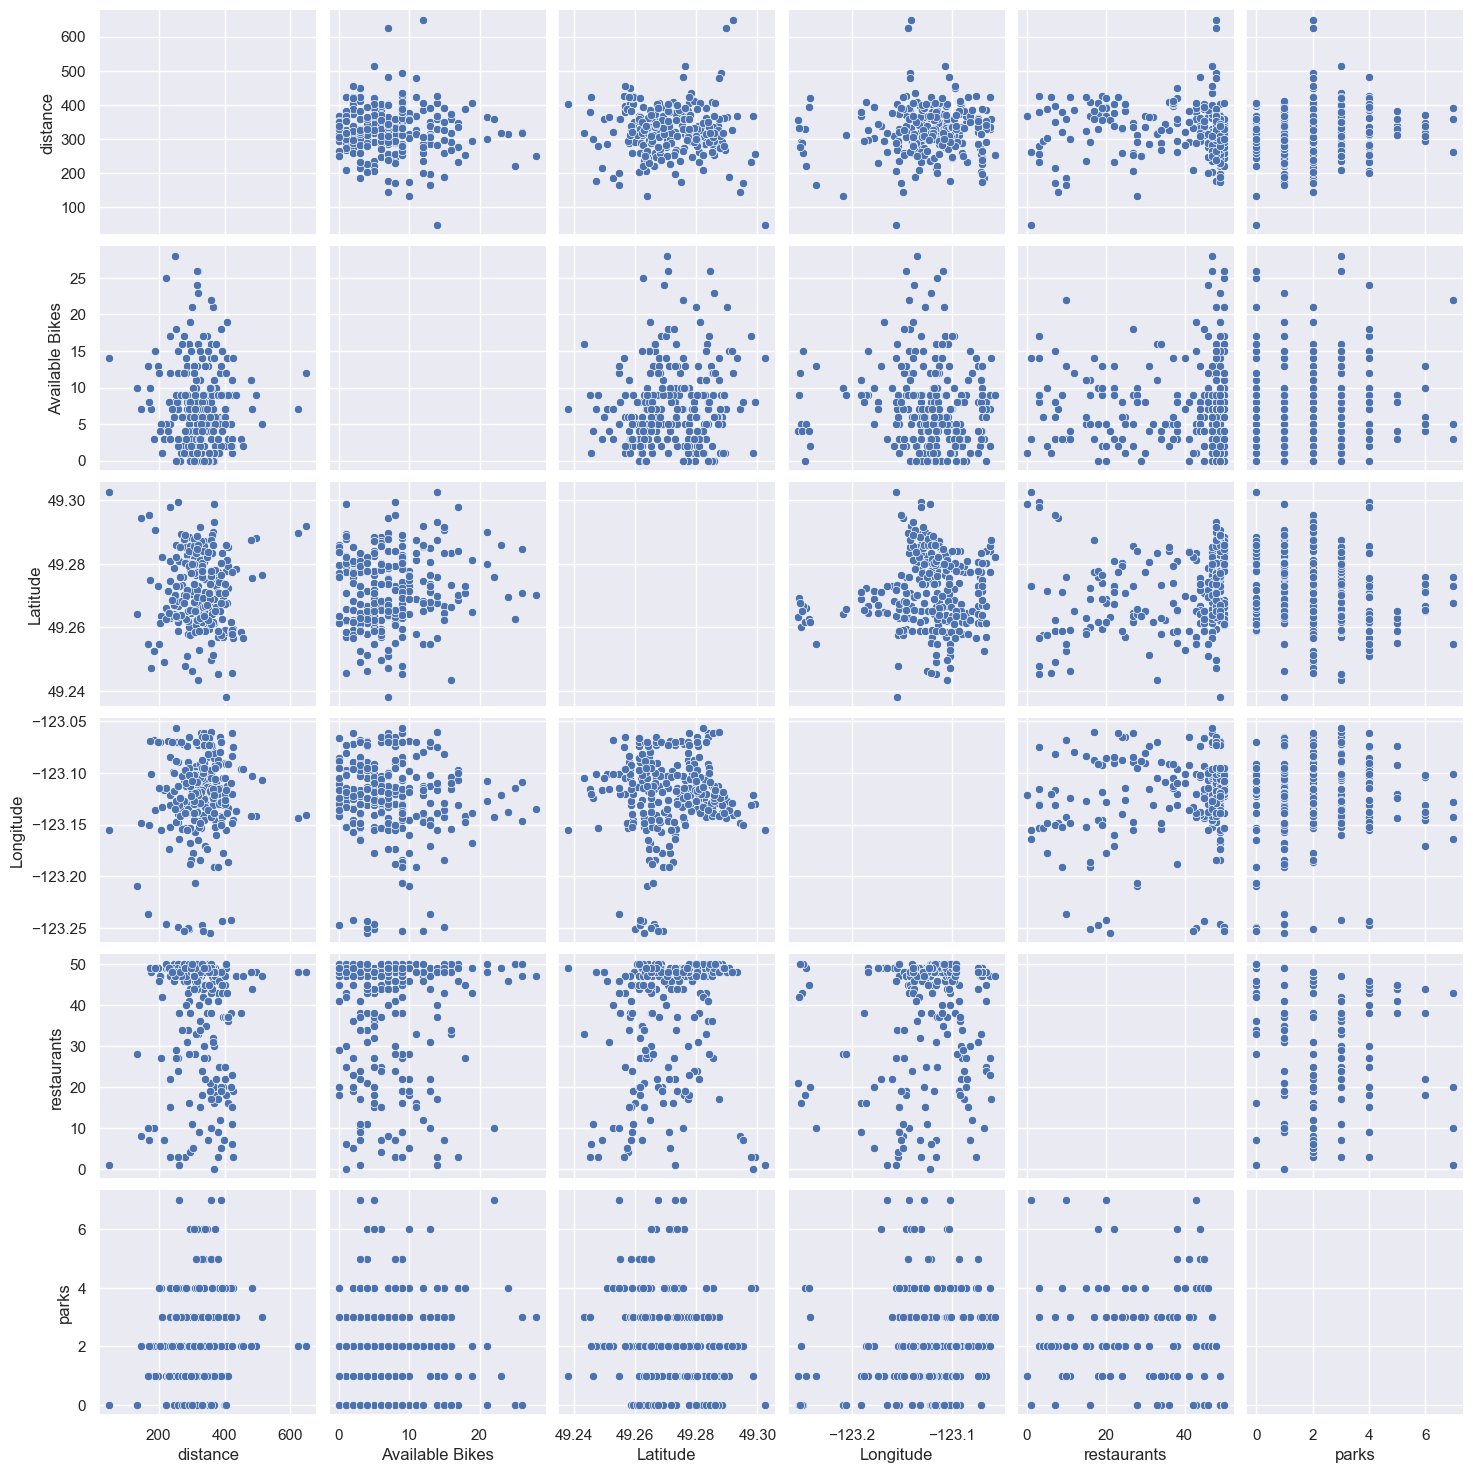

In [130]:
sns.pairplot(df_joined, kind='scatter', diag_kind='None')
plt.show()

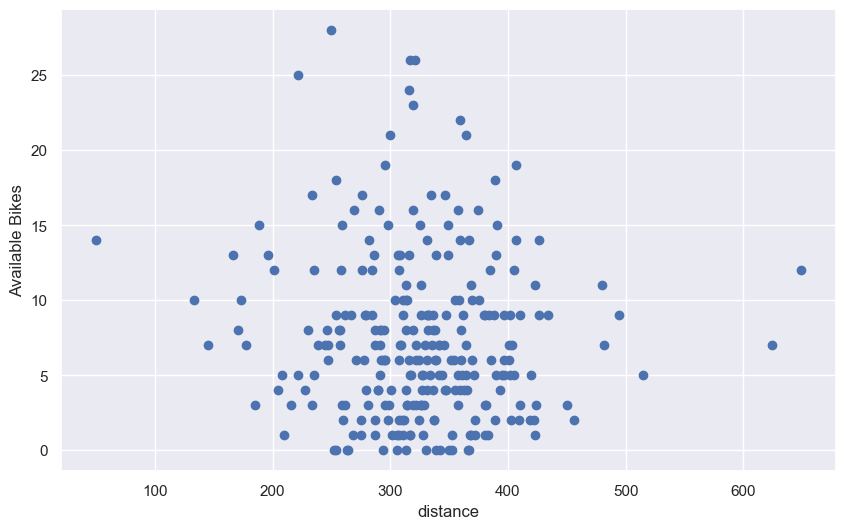

In [131]:
#Scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_joined['distance'], df_joined['Available Bikes'])
ax.set_xlabel('distance')
ax.set_ylabel('Available Bikes')
plt.show()

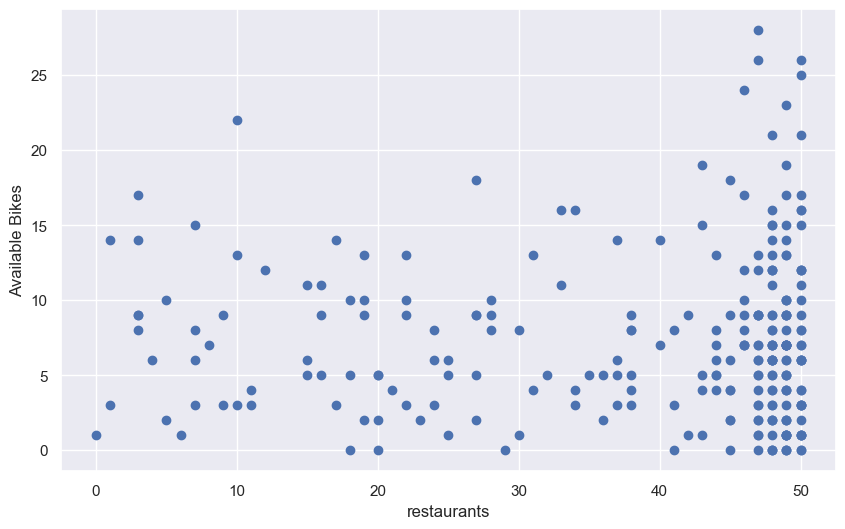

In [133]:
#Scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_joined['restaurants'], df_joined['Available Bikes'])
ax.set_xlabel('restaurants')
ax.set_ylabel('Available Bikes')
plt.show()

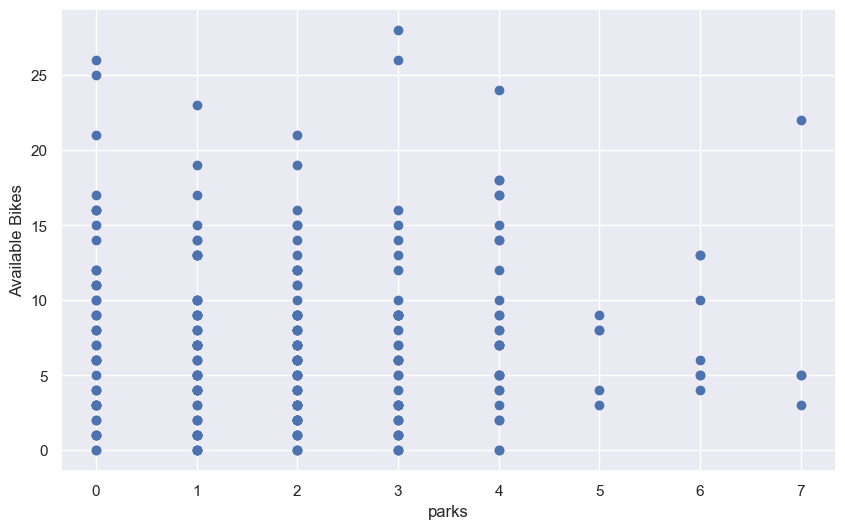

In [135]:
#Scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_joined['parks'], df_joined['Available Bikes'])
ax.set_xlabel('parks')
ax.set_ylabel('Available Bikes')
plt.show()

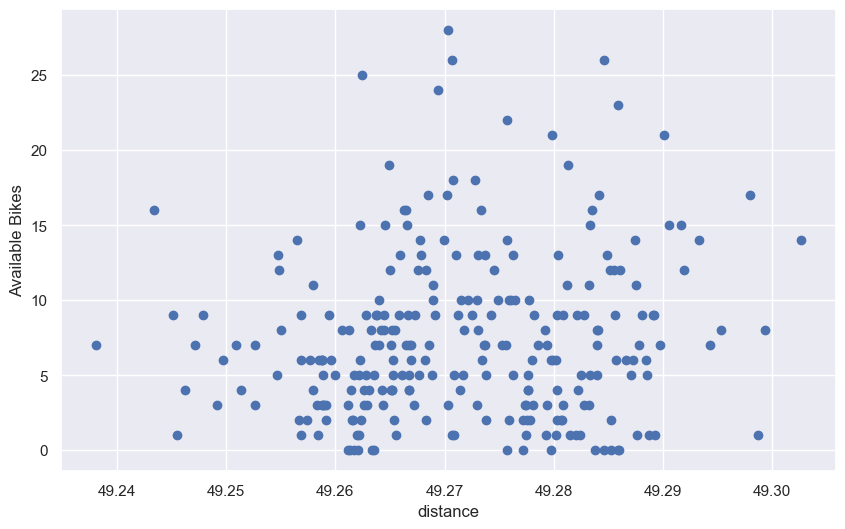

In [136]:
#Scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_joined['Latitude'], df_joined['Available Bikes'])
ax.set_xlabel('distance')
ax.set_ylabel('Available Bikes')
plt.show()

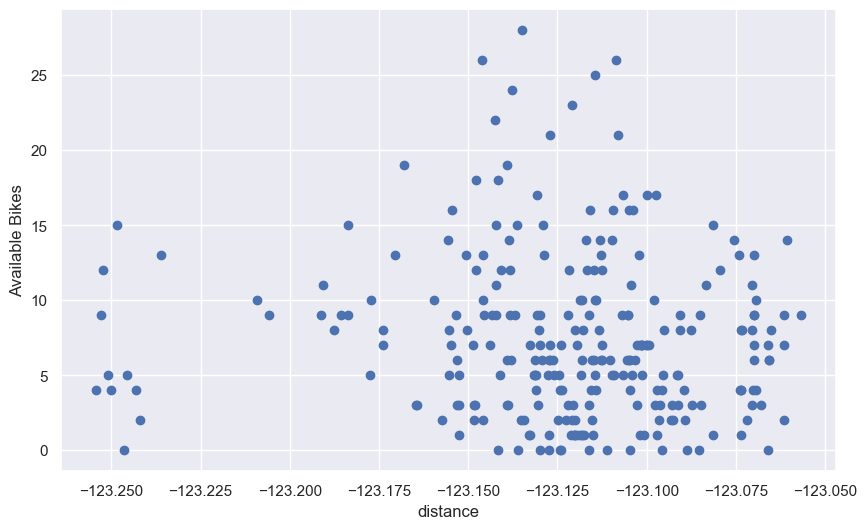

In [137]:
#Scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_joined['Longitude'], df_joined['Available Bikes'])
ax.set_xlabel('distance')
ax.set_ylabel('Available Bikes')
plt.show()

There is no relationship between the variables

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [115]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

Look at the data before and after the join to validate your data.

In [116]:
connection = create_connection("sm_app.sqlite")

Connection to SQLite DB successful


## Creating Table

In [117]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [138]:
create_stations_table = """
CREATE TABLE IF NOT EXISTS stations (
  bike_station_index INTEGER PRIMARY KEY,
  Available Bikes INTEGER);
"""


In [144]:
create_geodistance_table = """
CREATE TABLE IF NOT EXISTS geo_distance (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  bike_station_index INTEGER,
  Latitude INTEGER,
  Longitude INTEGER,
  FOREIGN KEY (bike_station_index) REFERENCES stations (bike_station_index)
  );
"""


In [139]:
execute_query(connection, create_stations_table)

Query executed successfully


In [140]:
execute_query(connection, create_geodistance_table)

Query executed successfully


## Inserting values

In [141]:
# Define cursor
cursor = connection.cursor()

In [ ]:
# insert values for stations
for _, row in df_joined.iterrows():
    cursor.execute('''
    INSERT INTO stations (bike_station_index, Available Bikes)
    VALUES (?, ?);
    ''', (row['bike_station_index'], row['Available Bikes']))

In [ ]:
# insert for geo+distance
for _, row in df_merged.iterrows():
    cursor.execute('''
    INSERT INTO geo_distance (bike_station_index, Latitude, Longitude)
    VALUES (?, ?, ?);
    ''', (row['bike_station_index'], row['Latitude'], row['Longitude']))

In [148]:
# define select from function
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [149]:
# select columns
select_geodistance = "SELECT * from geo_distance"
geo_distance = execute_read_query(connection, select_geodistance)

for i in geo_distance:
    print(i)

(0, None, 49.291909, -123.140713)


In [150]:
# select columns
select_stations = "SELECT * from stations"
stations = execute_read_query(connection, select_stations)

for i in stations:
    print(i)